In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [67]:
df=pd.read_csv('2 loan_approval_data.csv')

In [68]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [69]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [70]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handing Missing Values

In [71]:
Categorical_cols = df.select_dtypes(include=['object']).columns
Numerical_cols = df.select_dtypes(include=['float64']).columns

In [72]:
Categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [73]:
Numerical_cols 

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [74]:
Categorical_cols.size+Numerical_cols.size

20

In [75]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
df[Numerical_cols] = num_imputer.fit_transform(df[Numerical_cols])

In [76]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [77]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[Categorical_cols] = cat_imputer.fit_transform(df[Categorical_cols])

In [78]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [79]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA Exploratory Data Analysis

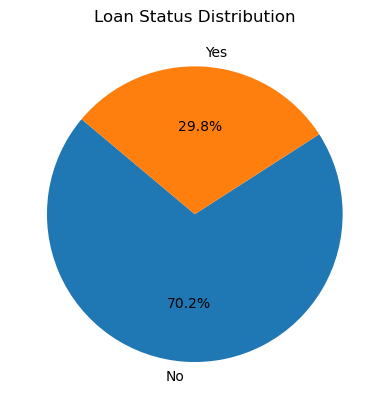

In [80]:
# How balanced our classs are ?
class_counts = df['Loan_Approved'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.show()

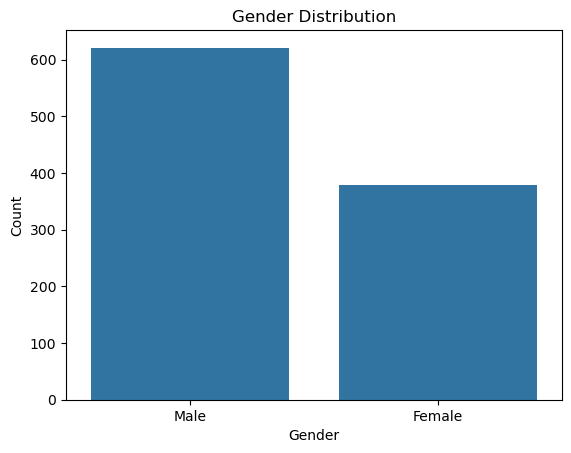

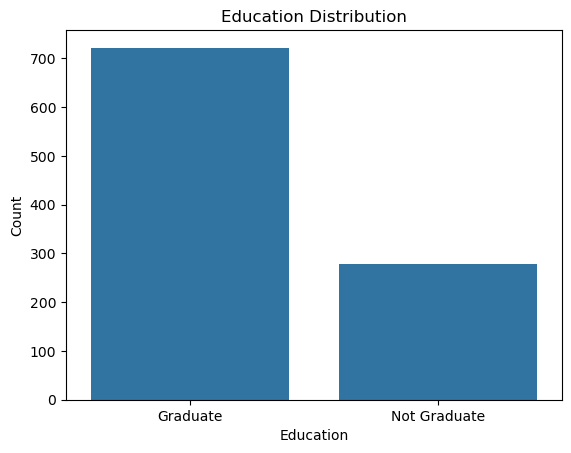

In [81]:
# analyis Categorical columns
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

education_counts = df['Education_Level'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()



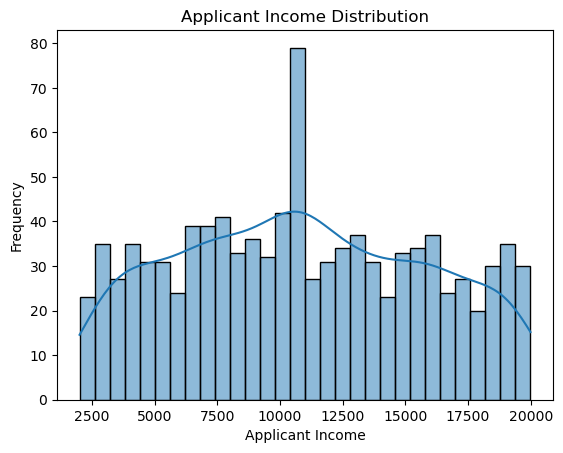

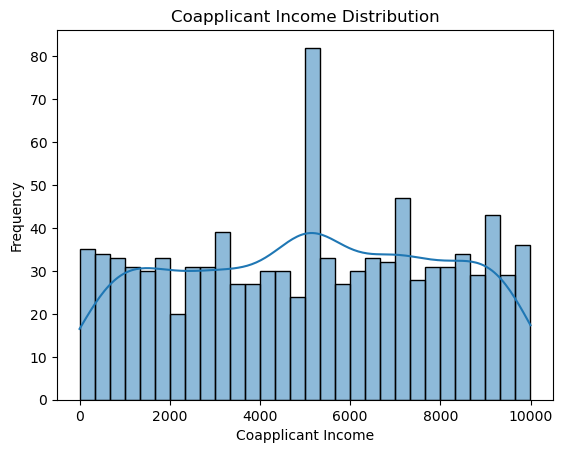

In [82]:
# Analyisi income 
sns.histplot(df['Applicant_Income'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()



sns.histplot(df['Coapplicant_Income'], bins=30, kde=True)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

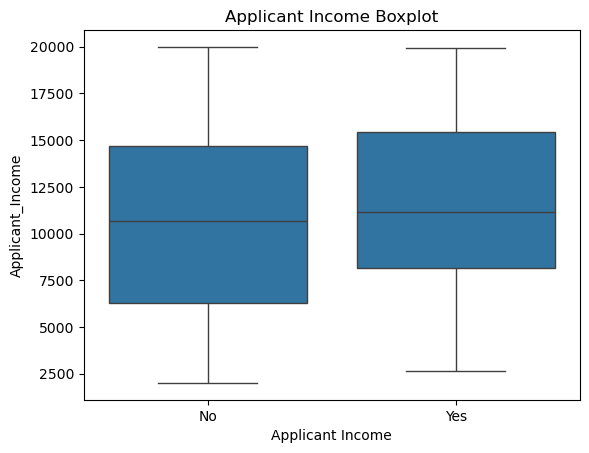

In [83]:
# Outlier -Boxplot
sns.boxplot(data=df, x='Loan_Approved', y='Applicant_Income')
plt.title('Applicant Income Boxplot')
plt.xlabel('Applicant Income')
plt.show()



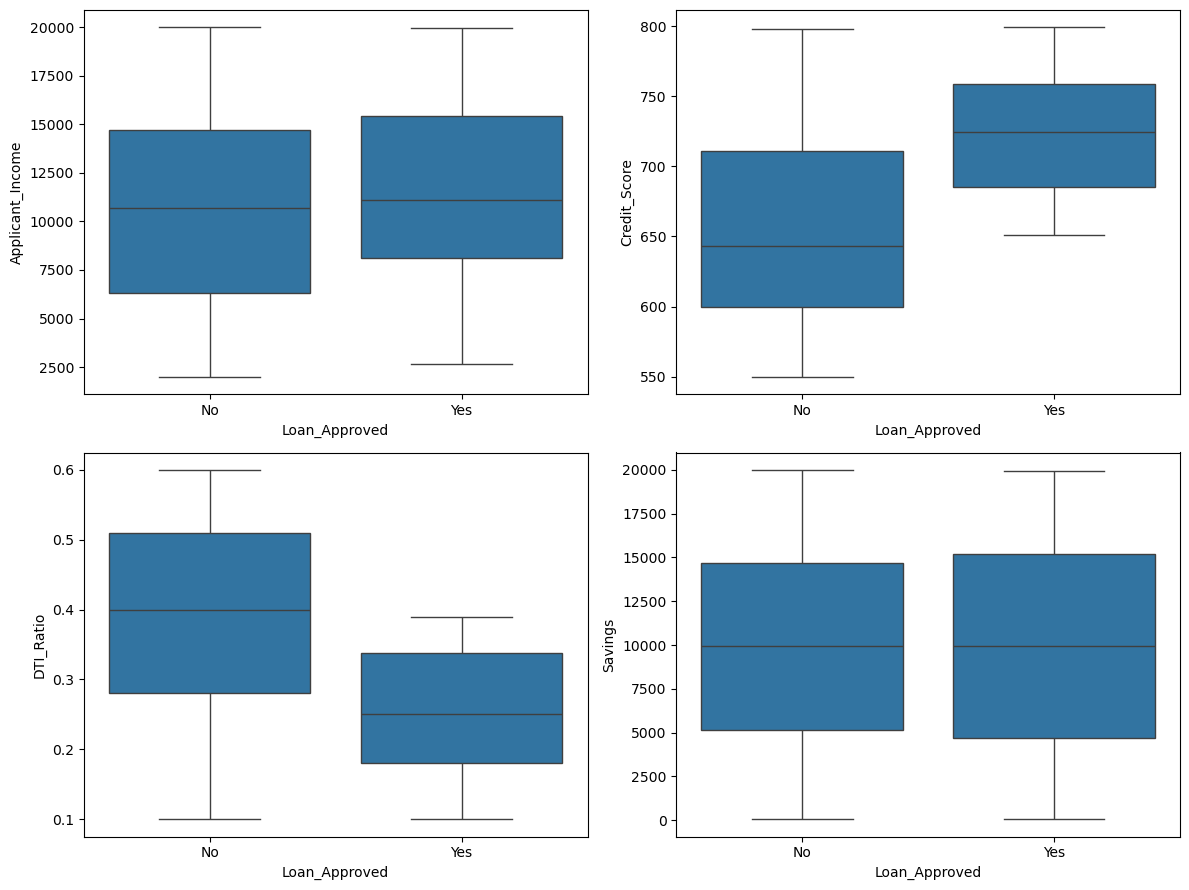

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
sns.boxplot(ax=axes[0,0], data=df, x='Loan_Approved', y='Applicant_Income')
sns.boxplot(ax=axes[0,1], data=df, x='Loan_Approved', y='Credit_Score')
sns.boxplot(ax=axes[1,0], data=df, x='Loan_Approved', y='DTI_Ratio')
sns.boxplot(ax=axes[1,1], data=df, x='Loan_Approved', y='Savings')
plt.tight_layout()

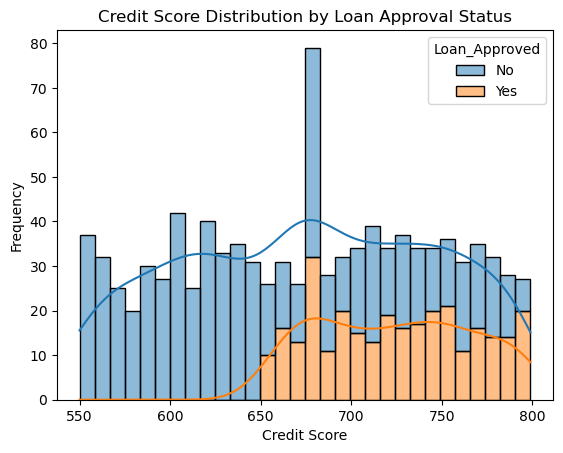

In [85]:
# Creadit Score vs Loan Approval
sns.histplot(data=df, x='Credit_Score', hue='Loan_Approved', bins=30, kde=True, multiple='stack')
plt.title('Credit Score Distribution by Loan Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [86]:
# Remove applicant ID as it is not useful for prediction
df.drop('Applicant_ID', axis=1, inplace=True)

In [87]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# Encoding Categorical Features

In [88]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [89]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

le=LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])



In [90]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [91]:
cols=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]

ohe=OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
encoded=ohe.fit_transform(df[cols])


encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index=df.index)

df=pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [92]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

In [93]:
encoded_df

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [94]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(1000, 15))

# Correlation Headmap

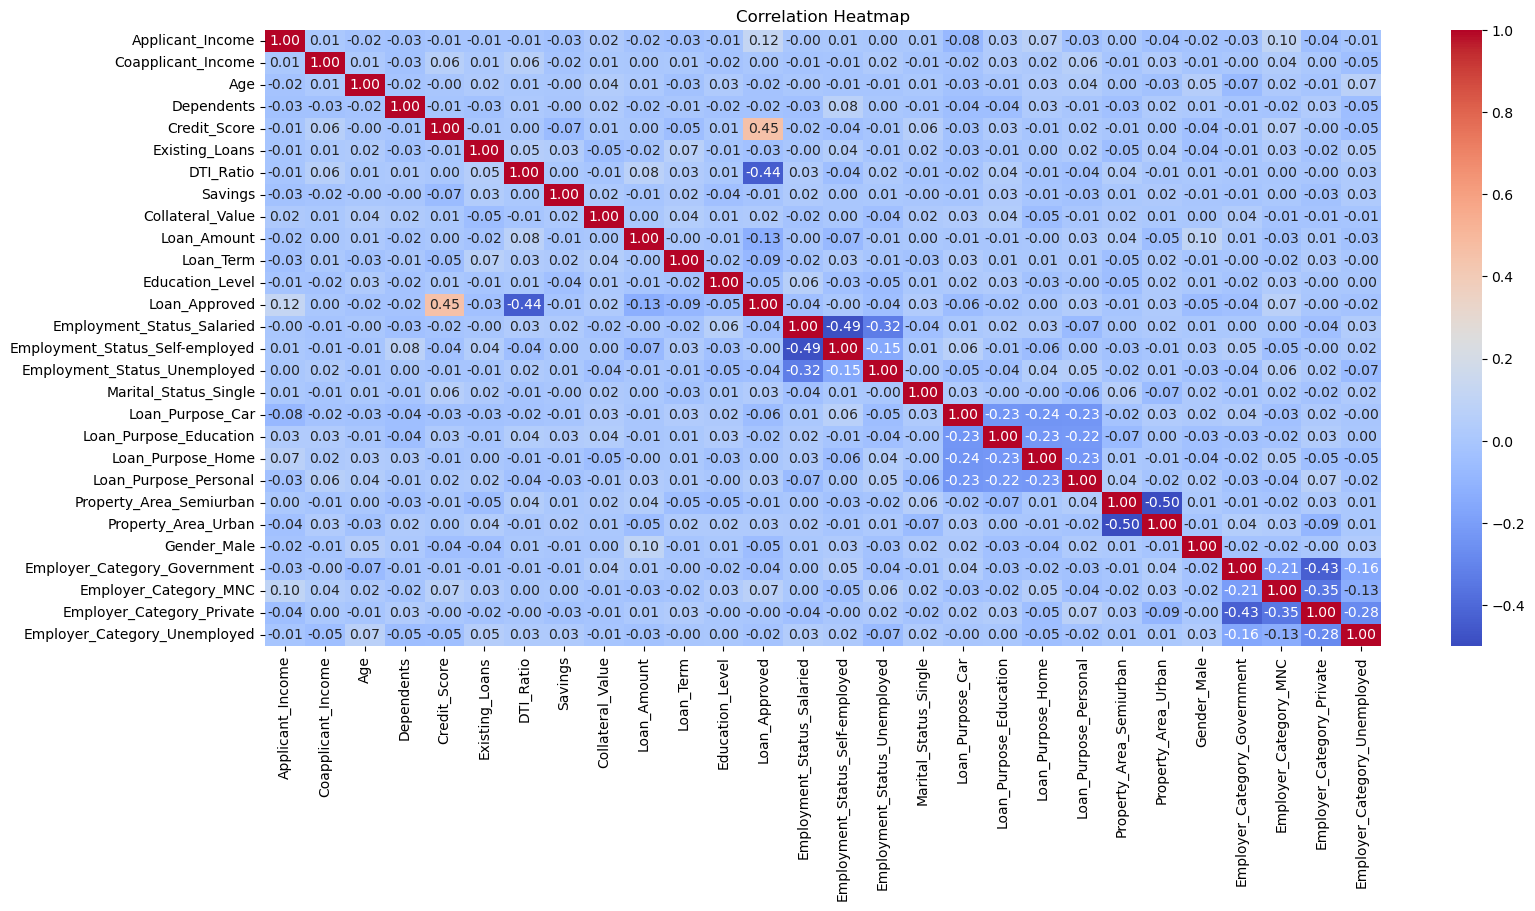

In [95]:
num_cols=df.select_dtypes(include=["number"])
corr_matrix=num_cols.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [96]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.006119,-0.000930,0.032498,0.040206,-0.050076,0.103456,0.013108,-0.025975,0.013923,-0.026566


In [97]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

# Train Test Split +Feature Scaling

In [98]:
x=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]

In [99]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )

In [101]:
x_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_Scaled=scaler.fit_transform(x_train)
x_test_Scaled=scaler.transform(x_test)

# Train  & Evaluate Models

In [113]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

log_model=LogisticRegression()
log_model.fit(x_train_Scaled,y_train)

y_pred=log_model.predict(x_test_Scaled)

#Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Model Evaluation:
Precision: 0.7846153846153846
Accuracy: 0.88
Confusion Matrix:
 [[125  14]
 [ 10  51]]
Recall: 0.8360655737704918
F1 Score: 0.8095238095238095


In [104]:
#kNN

from sklearn.neighbors import KNeighborsClassifier


knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_Scaled,y_train)

y_pred=knn_model.predict(x_test_Scaled)

#Evaluate the model
print("k-Nearest Neighbors Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


k-Nearest Neighbors Model Evaluation:
Precision: 0.6086956521739131
Accuracy: 0.745
Confusion Matrix:
 [[121  18]
 [ 33  28]]
Recall: 0.45901639344262296
F1 Score: 0.5233644859813084


In [105]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB



nb_model=GaussianNB()
nb_model.fit(x_train_Scaled,y_train)
y_pred=nb_model.predict(x_test_Scaled)

#Evaluate the model
print("Naive Bayes Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Naive Bayes Model Evaluation:
Precision: 0.8035714285714286
Accuracy: 0.865
Confusion Matrix:
 [[128  11]
 [ 16  45]]
Recall: 0.7377049180327869
F1 Score: 0.7692307692307693


# Best Model on The Basis of Precision Score- Naive Bayes Model

# Feature Engineering

In [112]:

df["DTI_Ratio_sq"]=df["DTI_Ratio"]**2
df["Credit_Score_sq"]=df["Credit_Score"]**2
df["Applicant_Income_log"]=np.log1p(df["Applicant_Income"])


x=df.drop(columns=["Loan_Approved","Credit_Score","DTI_Ratio"]) 
y=df["Loan_Approved"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )

#Scaling
scaler=StandardScaler()
x_train_Scaled=scaler.fit_transform(x_train)
x_test_Scaled=scaler.transform(x_test)

In [111]:
x_train.head()

,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [114]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

log_model=LogisticRegression()
log_model.fit(x_train_Scaled,y_train)

y_pred=log_model.predict(x_test_Scaled)

#Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Model Evaluation:
Precision: 0.7846153846153846
Accuracy: 0.88
Confusion Matrix:
 [[125  14]
 [ 10  51]]
Recall: 0.8360655737704918
F1 Score: 0.8095238095238095


In [115]:
#kNN

from sklearn.neighbors import KNeighborsClassifier


knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_Scaled,y_train)

y_pred=knn_model.predict(x_test_Scaled)

#Evaluate the model
print("k-Nearest Neighbors Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

k-Nearest Neighbors Model Evaluation:
Precision: 0.6458333333333334
Accuracy: 0.765
Confusion Matrix:
 [[122  17]
 [ 30  31]]
Recall: 0.5081967213114754
F1 Score: 0.5688073394495413


In [116]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB



nb_model=GaussianNB()
nb_model.fit(x_train_Scaled,y_train)
y_pred=nb_model.predict(x_test_Scaled)

#Evaluate the model
print("Naive Bayes Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Naive Bayes Model Evaluation:
Precision: 0.8113207547169812
Accuracy: 0.86
Confusion Matrix:
 [[129  10]
 [ 18  43]]
Recall: 0.7049180327868853
F1 Score: 0.7543859649122807
